## User Engagement Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
# load user engagement data
login = pd.read_csv('data/takehome_user_engagement.csv')
login.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
# check how many users
print('There are {} users.'.format (login['user_id'].nunique()))

There are 8823 users.


In [4]:
# check how many logins
print('There are {} logins.'.format(len(login)))

There are 207917 logins.


In [5]:
# convert time_stamp into datetime
login['time_stamp'] = pd.to_datetime(login['time_stamp'])

In [6]:
# check if a user logged in on 3 seperate days in a 7-day period
def login_days(df, days=7, logins=3):
    df['date'] = df['time_stamp'].dt.date   # add a new column as date only
    df = df.drop_duplicates(subset='date').sort_values('date')  # drop duplicated date and sort by date
    days_passed = df['date'].diff(periods=logins-1)  # check how many days passed for every 3 logins
    return any(days_passed <= timedelta(days=days))  # see if any days passed is less than 7 days

In [7]:
# apply the function to users
adopted_user = login.groupby('user_id').apply(login_days)

In [8]:
print('There are {} adopted users out of {} users.'.format((sum(adopted_user)), len(adopted_user)))

There are 1656 adopted users out of 8823 users.


## User Data

- name:  the  user's  name
- object_id:   the  user's  id
- email:  email  address
- creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
    - PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
    - GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)
    - ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
    - SIGNUP:  signed  up  via  the  website
    - SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)
- creation_time:  when  they  created  their  account
- last_session_creation_time:   unix  timestamp  of  last  login
- opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
- enabled_for_marketing_drip:  whether  they  are  on  the  regular marketing  email  drip
- org_id:   the  organization  (group  of  users)  they  belong  to 
- invited_by_user_id:   which  user  invited  them  to  join  (if  applicable)

In [9]:
# load user data
user = pd.read_csv('data/takehome_users.csv', encoding='latin-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


### Data wrangling

In [10]:
# drop 'name' and 'email' columns
user = user.drop(['name','email'],axis=1)
user.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
# check organization info
user['org_id'].value_counts().head(5)

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64

In [12]:
# check number of invites
user['invited_by_user_id'].value_counts().head(5)

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
Name: invited_by_user_id, dtype: int64

In [13]:
# drop these 2 columns
user = user.drop(['org_id', 'invited_by_user_id'], axis=1)
user.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0


In [14]:
# convert 'creation_time' to datetime format
user['creation_time'] = pd.to_datetime(user['creation_time'])
# convert 'last_session_creation_time' to datetime format
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'], unit='s')
# create a new column that holds duration of using the software
# calculate the differecence as the duration of usage
user['duration'] = user['last_session_creation_time'] - user['creation_time']
# convert it to days: number of days between last login and first creation date
user['duration'] = user['duration'].dt.days

In [15]:
user.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,duration
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,136.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,5.0


In [16]:
# add another column as how long the account was created
# assume the latest creation date as the current date
last_creation = user['creation_time'].max()
user['account_duration'] = last_creation - user['creation_time']
# convert it to days
user['account_duration'] = user['account_duration'].dt.days
user.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,0.0,38
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,136.0,196
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,0.0,437
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1.0,374
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,5.0,498


In [17]:
# remove the two time columns
user = user.drop(['creation_time', 'last_session_creation_time'], axis=1)
user.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration
0,1,GUEST_INVITE,1,0,0.0,38
1,2,ORG_INVITE,0,0,136.0,196
2,3,ORG_INVITE,0,0,0.0,437
3,4,GUEST_INVITE,0,0,1.0,374
4,5,GUEST_INVITE,0,0,5.0,498


In [18]:
# check new data
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   duration                    8823 non-null   float64
 5   account_duration            12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 562.6+ KB


In [19]:
# seems that duration has some missing values
user['duration'].isna().sum()

3177

In [20]:
# drop missing values for duration as user's has missing usage history will not be useful for analysis
# user_new = user.dropna(subset=['duration'])
# user_new.isna().sum()

In [21]:
# merge adopted user (from engagement data) and user data
user = user.set_index('object_id')  # set index
user.index.name = 'user_id'  # rename index column name
user_all = pd.concat([user, adopted_user], axis=1, join='inner')  # join on 'user_id'

In [23]:
user_all.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration,0
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,False
2,ORG_INVITE,0,0,136.0,196,True
3,ORG_INVITE,0,0,0.0,437,False
4,GUEST_INVITE,0,0,1.0,374,False
5,GUEST_INVITE,0,0,5.0,498,False


In [30]:
user_all.reset_index()

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration,0
0,1,GUEST_INVITE,1,0,0.0,38,False
1,2,ORG_INVITE,0,0,136.0,196,True
2,3,ORG_INVITE,0,0,0.0,437,False
3,4,GUEST_INVITE,0,0,1.0,374,False
4,5,GUEST_INVITE,0,0,5.0,498,False
...,...,...,...,...,...,...,...
8818,11996,ORG_INVITE,0,0,0.0,266,False
8819,11997,SIGNUP_GOOGLE_AUTH,0,0,5.0,505,False
8820,11998,GUEST_INVITE,1,1,0.0,33,False
8821,11999,PERSONAL_PROJECTS,0,0,2.0,729,False


In [33]:
# rename the column for adopted user
user_all.rename(columns = {0:'adopted_user'}, inplace = True)

In [34]:
user_all.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,False
2,ORG_INVITE,0,0,136.0,196,True
3,ORG_INVITE,0,0,0.0,437,False
4,GUEST_INVITE,0,0,1.0,374,False
5,GUEST_INVITE,0,0,5.0,498,False


In [35]:
# convert true/false to 0 and 1 on adopted user
user_all['adopted_user'] = user_all['adopted_user'].astype(int)

In [36]:
user_all.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,0
2,ORG_INVITE,0,0,136.0,196,1
3,ORG_INVITE,0,0,0.0,437,0
4,GUEST_INVITE,0,0,1.0,374,0
5,GUEST_INVITE,0,0,5.0,498,0


### EDA

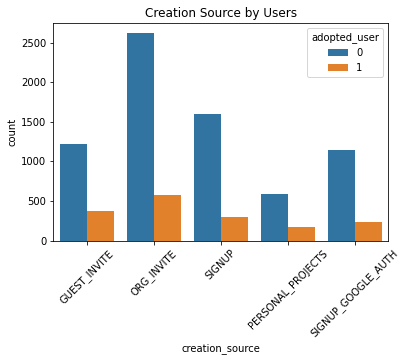

In [39]:
# check creation source of users
sns.countplot(x='creation_source', data=user_all, hue='adopted_user')
plt.xticks(rotation=45)
plt.title('Creation Source by Users')
plt.show()

In [52]:
# conduct a Chi Squared test for creation source
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(user_all['creation_source'], user_all['adopted_user'])
score = chi2_contingency(crosstab)
print('chi2 = {}, p = {} '.format(score[0], score[1]))

chi2 = 41.27933208242451, p = 2.3526508745340972e-08 


In [59]:
user_all.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x)).sort_values(ascending=False)

creation_source
GUEST_INVITE          0.232368
PERSONAL_PROJECTS     0.225131
ORG_INVITE            0.180050
SIGNUP_GOOGLE_AUTH    0.172563
SIGNUP                0.159115
Name: adopted_user, dtype: float64

Users are more active when they are being invited by guests or having personal projects.

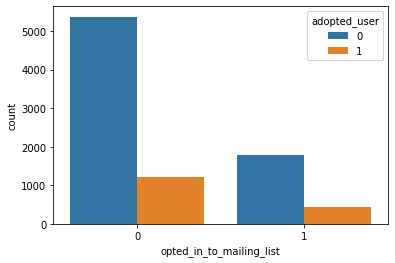

In [62]:
# check opted in marketing emails
sns.countplot(x='opted_in_to_mailing_list',data=user_all,hue='adopted_user')
plt.show()

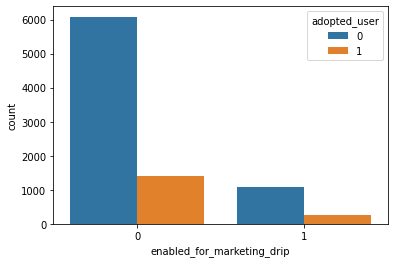

In [63]:
# check enabled for marketing drip
sns.countplot(x='enabled_for_marketing_drip',data=user_all,hue='adopted_user')
plt.show()

Majority of users do not receive marketing emails or on regular marketing drip.

### Modeling

In [64]:
# convert creation source into dummies
user_all = pd.get_dummies(user_all, columns=['creation_source'])
user_all.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,,,
1,1,0,0.0,38,0,1,0,0,0,0
2,0,0,136.0,196,1,0,1,0,0,0
3,0,0,0.0,437,0,0,1,0,0,0
4,0,0,1.0,374,0,1,0,0,0,0
5,0,0,5.0,498,0,1,0,0,0,0


In [66]:
# make all column names lower case
user_all.columns = user_all.columns.str.lower()
user_all.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,duration,account_duration,adopted_user,creation_source_guest_invite,creation_source_org_invite,creation_source_personal_projects,creation_source_signup,creation_source_signup_google_auth
user_id,,,,,,,,,,
1,1,0,0.0,38,0,1,0,0,0,0
2,0,0,136.0,196,1,0,1,0,0,0
3,0,0,0.0,437,0,0,1,0,0,0
4,0,0,1.0,374,0,1,0,0,0,0
5,0,0,5.0,498,0,1,0,0,0,0


In [67]:
# split training and test data
# I will use random forest and thus no need to scale the data
from sklearn.model_selection import train_test_split
X = user_all.drop(['adopted_user'], axis=1)
y = user_all['adopted_user']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=123)

In [70]:
# fit data into random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=12, class_weight='balanced')
# perform hyperparameter tuning
params = {'n_estimators': [10, 50, 100, 200],
        'criterion': ['gini','entropy']
         }
cv_rf = GridSearchCV(estimator=rf, param_grid=params, cv=5)
cv_rf.fit(X_train, y_train)

print(cv_rf.best_params_)
print(cv_rf.best_score_)

{'criterion': 'gini', 'n_estimators': 100}
0.9624536472836857


In [71]:
# evaluate our model with some metrics
from sklearn.metrics import classification_report, accuracy_score
rf = RandomForestClassifier(criterion='gini',
                           n_estimators=100,
                           random_state=12)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
acc = accuracy_score(y_test, ypred)
print(f'Accuracy score for optimized random forest model: {acc}')
print('\n')
print(classification_report(y_test, ypred))

Accuracy score for optimized random forest model: 0.9563739376770538


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1423
           1       0.91      0.86      0.88       342

    accuracy                           0.96      1765
   macro avg       0.94      0.92      0.93      1765
weighted avg       0.96      0.96      0.96      1765



In [76]:
imp = pd.Series(rf.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

duration                              0.885350
account_duration                      0.091727
opted_in_to_mailing_list              0.004633
enabled_for_marketing_drip            0.004154
creation_source_guest_invite          0.003464
creation_source_org_invite            0.003231
creation_source_signup                0.002707
creation_source_signup_google_auth    0.002484
creation_source_personal_projects     0.002250
dtype: float64


- We can see that duration (i.e., how long the user's been using the software) is the most predicting feature of adopted users. To increase number of adopted users, it is suggested that company should encourage the old users to log in and continue using the software once they had been using already
- How users signed up is also important (sum of all sources). Guest invite and organization invite are the top two that make higher user adoption. So the company should encourage users to invite others
- For account duration, the earlier the user signed up the more engaged they will be. But the company could not do anything now to reverse how early users signed up already